In [1]:
import numpy as np
import matplotlib.pyplot as plt
#const
hb = 1 * 1e-34
c = 3 * 1e8
k = 1.38 * 1e-23
eps = 8.85e-12
epsCdSe = 10.2
q = 1.6e-19
t = 300

mee = 9 * 1e-31
me = 0.13 * mee
mh = 0.45 * mee
l = 4 * 1e-9
# bandgap 1.74 eV 712.55283 nm 2.78779e-19 J
hbe = 6.58e-16

In [61]:
def jToEv(j):
    return j* hbe/hb

def jToWl(j):
    return 2 * np.pi * c * hb / j

def evToWl(ev):
    return 2 * np.pi * c * hbe / ev

def wlToEv(wl):
    return  2 * np.pi * c * hbe / wl

def enLevels(nx,ny,nz, m = me):
    enL = []
    qNumL = []
    
    for x in nx:
        for y in ny:
            for z in nz:
                nSq = x**2 + y**2 + z**2
                eex = jToEv((1/m) * (hb * np.pi)** 2 / (2 *  l **2)  * nSq)
                enL.append(eex)
                qNum = [x, y, z]
                qNumL.append(qNum)

In [24]:
l = 4.4 * 1e-9
eex = (1/me + 1/mh) * (hb * np.pi)** 2 / (2*  l **2) * 3

colPot = q**2/(4 * np.pi * eps * epsCdSe * l)
print('columbian potential',colPot * hbe/hb)
print('first level',eex * hbe/hb)
print(2 * np.pi * c * hbe / (eex * hbe/hb + 1.74  ))
2 * np.pi * c * hbe / (eex * hbe/hb + 1.74 - colPot * hbe/hb)  

columbian potential 0.033748919723082756
first level 0.5542952578865198
5.406020761163069e-07


5.486730170923738e-07

In [194]:
l = 4.25 * 1e-9

nx = [1,2,3]
ny = [1,2,3]
nz = [1,2,3]
enL = []
for x in nx:
    for y in ny:
        for z in nz:
            nSq = x**2 + y**2 + z**2
            eex = (1/me + 1/mh) * (hb * np.pi)** 2 / (2 *  l **2)  * nSq
            colPot = q**2/(4 * np.pi * eps * epsCdSe * l)

            en = 2 * np.pi * c * hbe / (eex * hbe/hb + 1.74 - colPot * hbe/hb)
            enL.append(en)
            #print('nx = ',x,'ny = ', y,'nz = ', z, 'energy =', en)
            #eex = (1/mee *1/2) * (hb * np.pi)** 2 / (  l **2) * n
#fucking geometry for the quantum box works!!!

print(2 * np.pi * c * hbe / ((1/me) * (hb * np.pi)** 2 / (2 *  l **2) * hbe/ hb)) 
#2 * np.pi * c * hbe / ((1/mh) * (hb * np.pi)** 2 / (2 *  l **2) * hbe/hb)

eexe = (1/me + 1/me) * (hb * np.pi)** 2 / (2 *  l **2)
eexh = (1/me + 1/mh) * (hb * np.pi)** 2 / (2 *  l **2)
# 2 * np.pi * c * hbe / (2 * np.pi * c * hbe / ((1/me) * (hb * np.pi)** 2 / (2 *  l **2) * hbe/ hb) * hbe/hb + 1.74 - colPot * hbe/hb) - 2 * np.pi * c * hbe / (2 * np.pi * c * hbe / ((1/mh) * (hb * np.pi)** 2 / (2 *  l **2) * hbe/hb) * hbe/hb + 1.74 - colPot * hbe/hb)
phEnE = 2 * np.pi * c * hbe / (eexe * hbe/hb + 1.74 - colPot * hbe/hb)
phEnH = 2 * np.pi * c * hbe / (eexh * hbe/hb + 1.74 - colPot * hbe/hb)
#phEnH - phEnE 

8.072259136149388e-06


In [279]:
l = 4.4 * 1e-9
bG = 1.74
colPot = q**2/(4 * np.pi * eps * epsCdSe * l)

def enLevels2(nx,ny,nz, m = me):
    enL = np.zeros([len(nx),len(ny),len(nz)])
    
    for x in nx:
        for y in ny:
            for z in nz:
                nSq = x**2 + y**2 + z**2
                enL[x-1][y-1][z-1] = jToEv((1/m) * (hb * np.pi)** 2 / (2 *  l **2)  * nSq)
    return enL

nx = [1,2,3]
ny = [1,2,3]
nz = [1,2,3]            
enE, qNumE = enLevels(nx,ny,nz, me)
enH, qNumH = enLevels(nx,ny,nz, mh)
mainEx = evToWl(enH + enE + bG)


In [292]:
nx = [1,2,3,4]
ny = [1,2,3,4]
nz = [1,2,3,4] 
enE = enLevels2(nx,ny,nz, me)
enH = enLevels2(nx,ny,nz, mh)
enE

array([[[0.43005667, 0.86011333, 1.57687444, 2.58033999],
        [0.86011333, 1.29017   , 2.00693111, 3.01039666],
        [1.57687444, 2.00693111, 2.72369222, 3.72715777],
        [2.58033999, 3.01039666, 3.72715777, 4.73062332]],

       [[0.86011333, 1.29017   , 2.00693111, 3.01039666],
        [1.29017   , 1.72022666, 2.43698777, 3.44045332],
        [2.00693111, 2.43698777, 3.15374888, 4.15721443],
        [3.01039666, 3.44045332, 4.15721443, 5.16067999]],

       [[1.57687444, 2.00693111, 2.72369222, 3.72715777],
        [2.00693111, 2.43698777, 3.15374888, 4.15721443],
        [2.72369222, 3.15374888, 3.87050999, 4.87397554],
        [3.72715777, 4.15721443, 4.87397554, 5.8774411 ]],

       [[2.58033999, 3.01039666, 3.72715777, 4.73062332],
        [3.01039666, 3.44045332, 4.15721443, 5.16067999],
        [3.72715777, 4.15721443, 4.87397554, 5.8774411 ],
        [4.73062332, 5.16067999, 5.8774411 , 6.88090665]]])

In [285]:
evToWl(enE[0][0][0] + enH[0][0][0] + bG)

5.406020761163069e-07

In [286]:
evToWl(enE[0][0][0] + enH[1][0][0] + bG)

5.128316808753104e-07

In [288]:
evToWl(enE[0][0][0] + enH[3][0][0] + bG)

4.2541786703920704e-07

In [287]:
evToWl(enE[1][0][0] + enH[1][0][0] + bG)

4.354085898866592e-07

In [255]:
enE1 = enE[0][0][0]
for x in nx:
    if  (1 - x)%2 == 1:
        print(enE1 - enH[x-1][0][0])
        
for y in ny:
    if  (1 - y)%2 == 1:
        print(enE1 - enH[0][y-1][0])

0.18157948103179097
0.18157948103179097


In [250]:
1%2

1

In [237]:
eneM, eneMcount = np.unique(enE, return_counts = True)
transEnL = []
transCL = []
for _ in range(len(eneM)):
    transEn, transC = np.unique(enH + eneM[_] , return_counts = True)
    transC = eneMcount * transC
    transEnL.append(transEn)
    transCL.append(transC)
    

In [242]:
eneM

array([0.43005667, 0.86011333, 1.29017   , 1.57687444, 1.72022666,
       2.00693111, 2.43698777, 2.72369222, 3.15374888, 3.87050999])

In [243]:
eneMcount

array([1, 3, 3, 3, 1, 6, 3, 3, 3, 1], dtype=int64)

In [239]:
transCL

[array([ 1,  9,  9,  9,  1, 36,  9,  9,  9,  1], dtype=int64),
 array([ 1,  9,  9,  9,  1, 36,  9,  9,  9,  1], dtype=int64),
 array([ 1,  9,  9,  9,  1, 36,  9,  9,  9,  1], dtype=int64),
 array([ 1,  9,  9,  9,  1, 36,  9,  9,  9,  1], dtype=int64),
 array([ 1,  9,  9,  9,  1, 36,  9,  9,  9,  1], dtype=int64),
 array([ 1,  9,  9,  9,  1, 36,  9,  9,  9,  1], dtype=int64),
 array([ 1,  9,  9,  9,  1, 36,  9,  9,  9,  1], dtype=int64),
 array([ 1,  9,  9,  9,  1, 36,  9,  9,  9,  1], dtype=int64),
 array([ 1,  9,  9,  9,  1, 36,  9,  9,  9,  1], dtype=int64),
 array([ 1,  9,  9,  9,  1, 36,  9,  9,  9,  1], dtype=int64)]

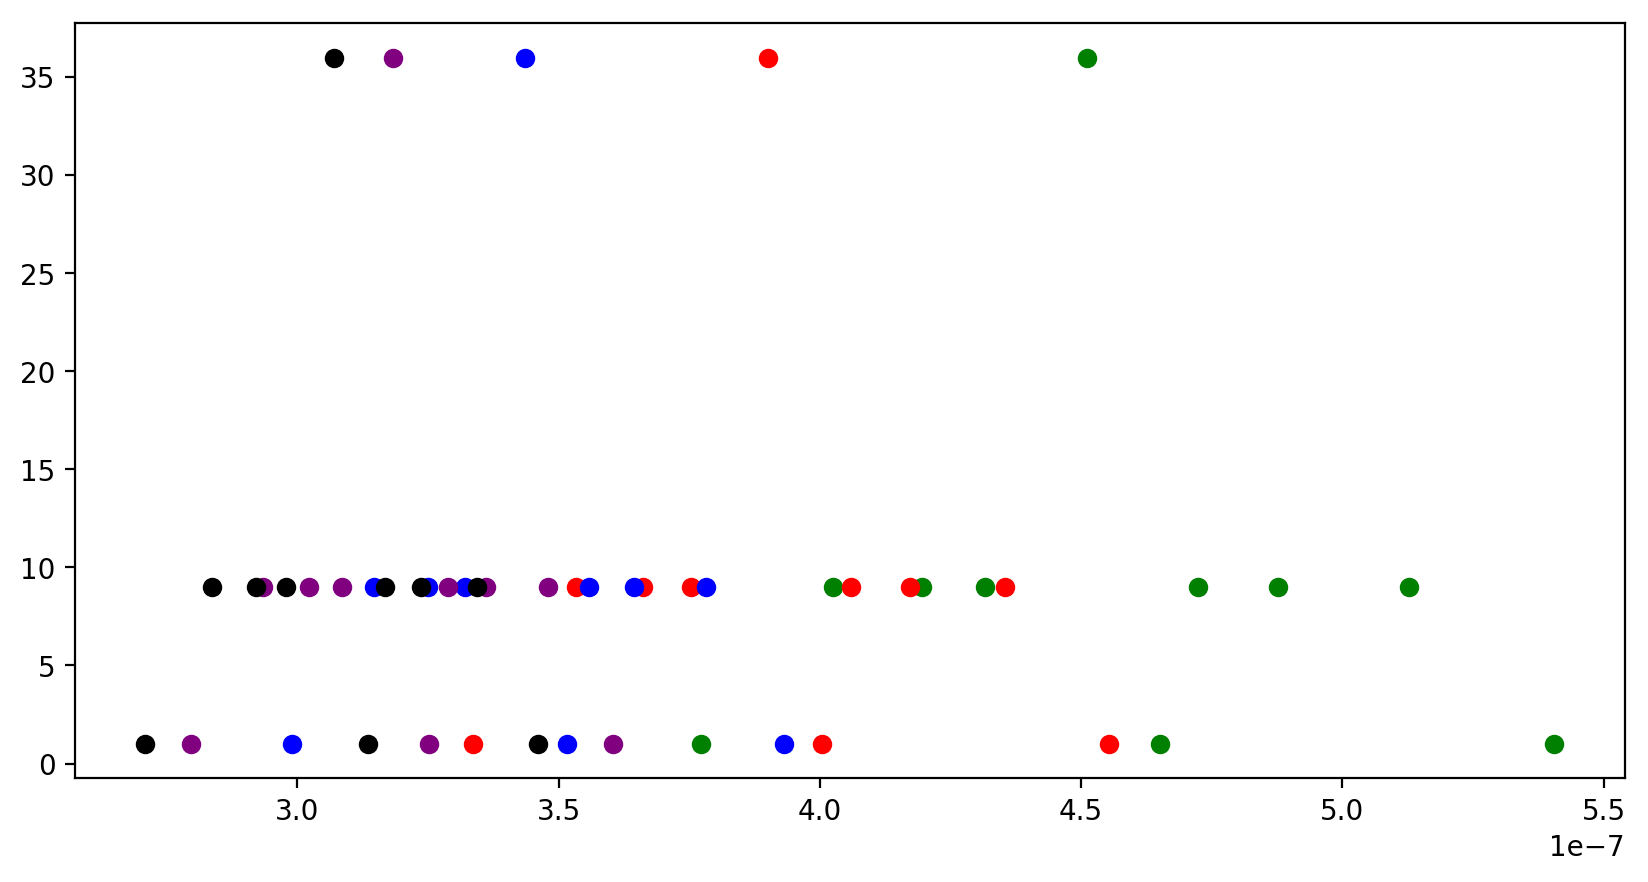

In [241]:
fig, ax = plt.subplots(num=None, figsize=(10, 5), dpi=200, facecolor='w', edgecolor='k')
ax.plot(evToWl(transEnL[0] + bG), transCL[0] , linestyle='', marker='o', color='green')
ax.plot(evToWl(transEnL[1] + bG), transCL[1] , linestyle='', marker='o', color='red')
ax.plot(evToWl(transEnL[2] + bG), transCL[2] , linestyle='', marker='o', color='blue')
ax.plot(evToWl(transEnL[3] + bG), transCL[3] , linestyle='', marker='o', color='purple')
ax.plot(evToWl(transEnL[4] + bG), transCL[4] , linestyle='', marker='o', color='black')

plt.show()

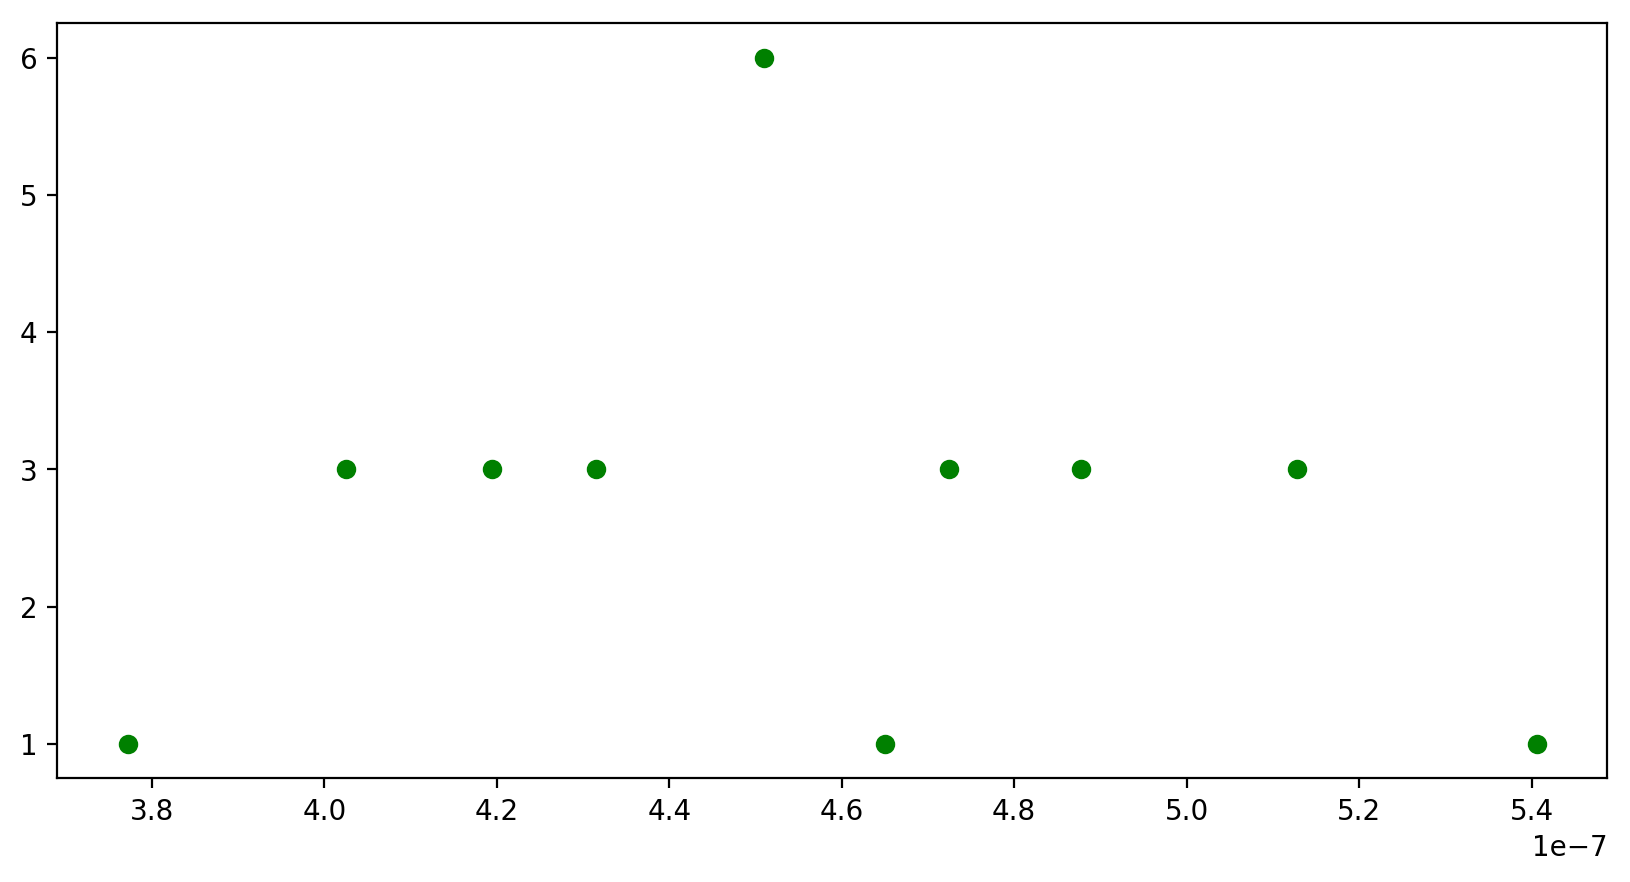

In [200]:
en1 = evToWl(enH + enE[0][0][0] + bG)
x, y = np.unique(en1, return_counts = True)
fig, ax = plt.subplots(num=None, figsize=(10, 5), dpi=200, facecolor='w', edgecolor='k')
ax.plot(x , y, linestyle='', marker='o', color='green')

In [129]:
ex1 = evToWl(enH + enE[0] + bG)
ex2 = evToWl(enH + enE[1] + bG)
ex3 = evToWl(enH + enE[2] + bG)

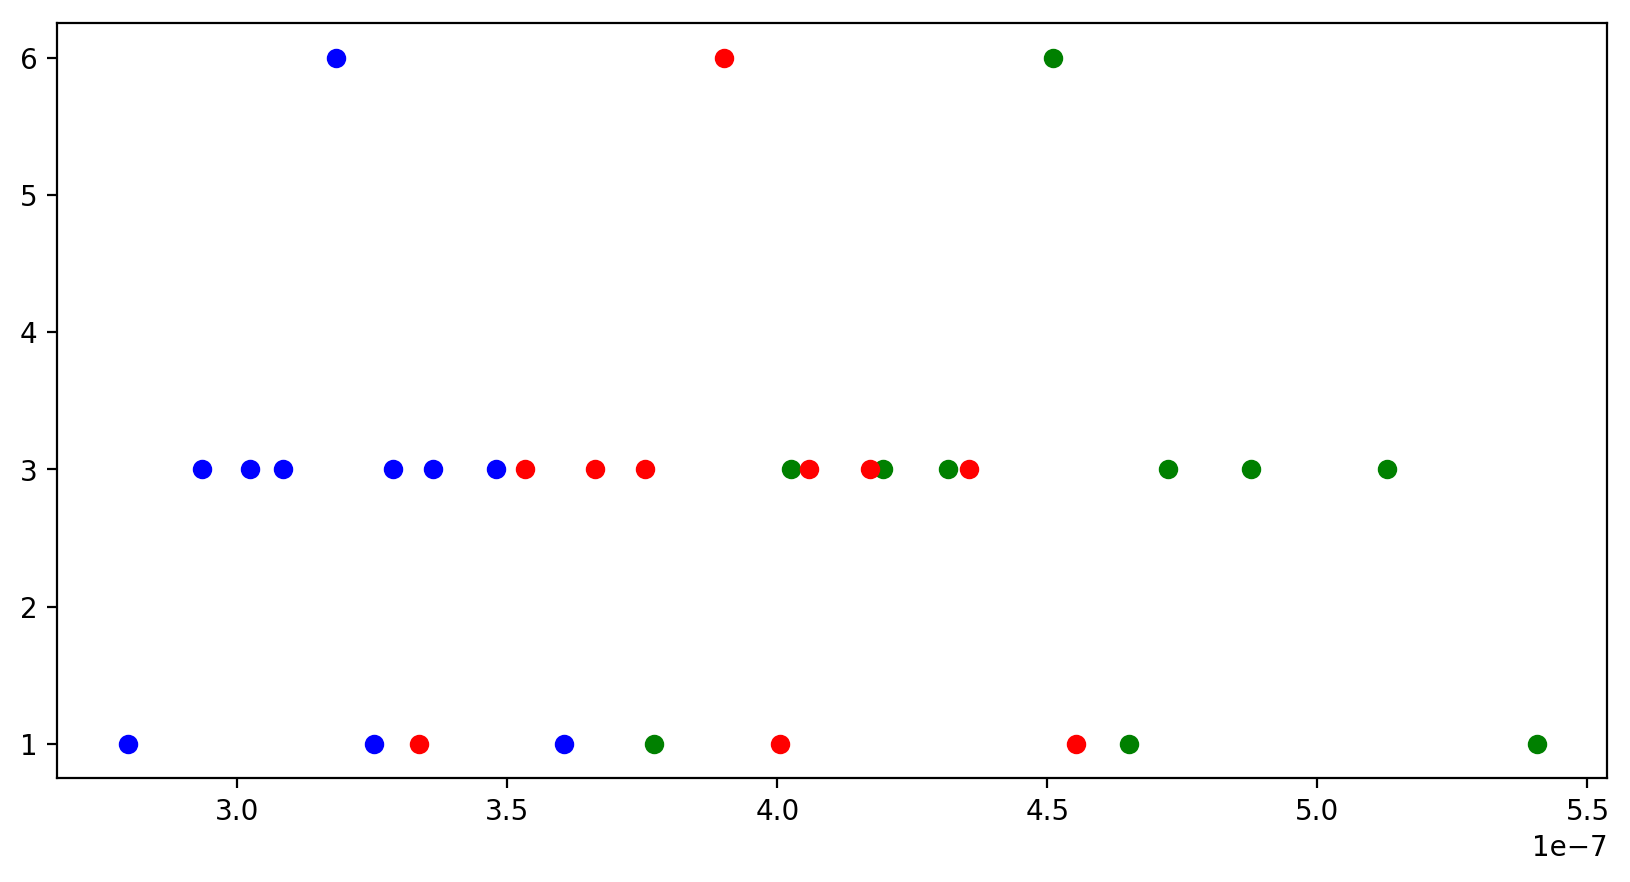

In [136]:
x, y = np.unique(ex1, return_counts = True)
x2, y2 = np.unique(ex2, return_counts = True)
x3, y3 = np.unique(ex3, return_counts = True)

fig, ax = plt.subplots(num=None, figsize=(10, 5), dpi=200, facecolor='w', edgecolor='k')
ax.plot(x , y, linestyle='', marker='o', color='green')
ax.plot(x2 , y2, linestyle='', marker='o', color='red')
ax.plot(x3 , y3, linestyle='', marker='o', color='blue')



In [93]:
np.array([0,2]) + 1

array([1, 3])

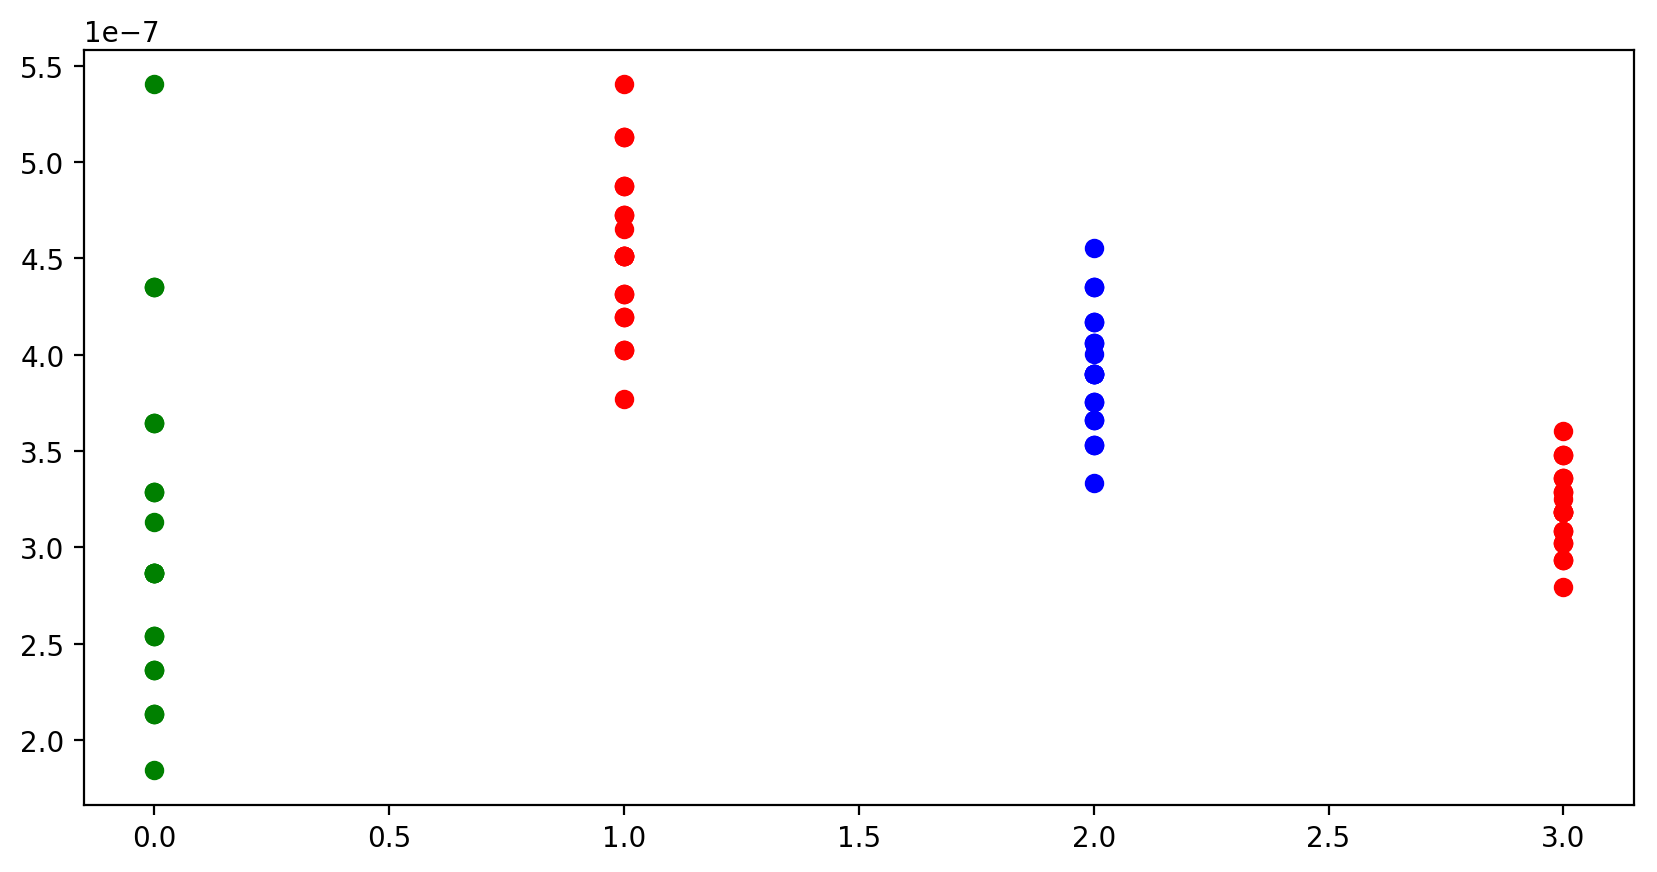

In [131]:
enL = np.array(enL)
fig, ax = plt.subplots(num=None, figsize=(10, 5), dpi=200, facecolor='w', edgecolor='k')
ax.plot(np.ones(len(mainEx)) -1 , (mainEx), linestyle='', marker='o', color='green')
ax.plot(np.ones(len(ex1)) , (ex1), linestyle='', marker='o', color='red')
ax.plot(np.ones(len(ex2)) +1, (ex2), linestyle='', marker='o', color='blue')
ax.plot(np.ones(len(ex3)) +2, (ex3), linestyle='', marker='o', color='red')



In [52]:
np.ones(2)

array([1., 1.])

In [177]:
#me* (CdSe) = 0.13 me
#mh* (CdSe) = 0.45 me
mee = 9 * 1e-31
me = 0.13 * mee
mh = 0.45 * mee
l = 10 * 1e-9

n = np.linspace(1, 10, num=10)

ee= np.array([])
eh= np.array([])
ee = (hb * np.pi)** 2 / (2 * me* l **2) * n ** 2
eh = (hb * np.pi)** 2 / (2 * mh* l **2) * n ** 2

eTrans = []

jj = -1
for __ in ee:
    jj += 1
    eTrans1 = np.array([])
    ii = -1
    
    for _ in ee:
        ii += 1
        eTrans1 = np.append(eTrans1, ee[jj] - eh[ii])
    eTrans.append(eTrans1)
#e[0] - e[99]
ee[:10]
#k*t
print(eTrans[0])
eTrans[8]

[ 2.99930998e-21 -6.56099058e-22 -6.74844745e-21 -1.52777352e-20
 -2.62439623e-20 -3.96471288e-20 -5.54872346e-20 -7.37642798e-20
 -9.44782644e-20 -1.17629188e-19]


array([3.40421683e-19, 3.36766274e-19, 3.30673925e-19, 3.22144637e-19,
       3.11178410e-19, 2.97775244e-19, 2.81935138e-19, 2.63658093e-19,
       2.42944108e-19, 2.19793184e-19])

In [146]:
a = np.array([])
np.append(a, [[4, 5, 6], [7, 8, 9]])

array([4., 5., 6., 7., 8., 9.])

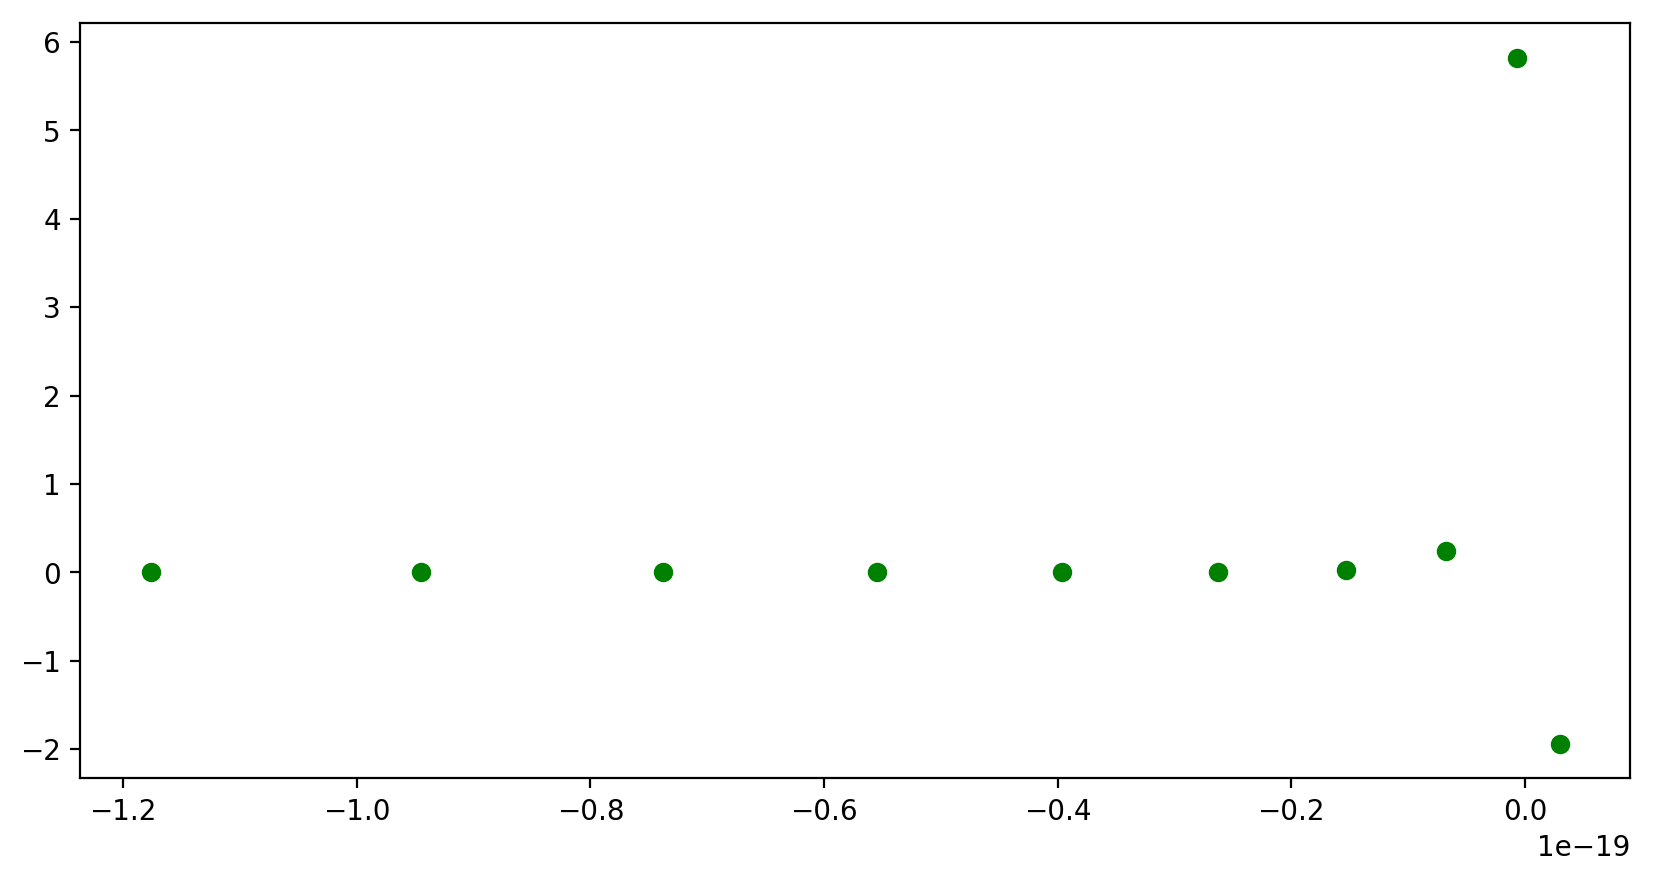

array([-1.94016846e+00,  5.82322376e+00,  2.43654043e-01,  2.56043727e-02,
        1.76897691e-03,  6.93370042e-05,  1.51104036e-06,  1.82799890e-08,
        1.22754241e-10,  4.57569593e-13])

In [176]:
e = eTrans[0]
num = 1/ (np.exp(-(e - 0 )/(k*t)) - 1)
#num = num #/sum(num)
fig, ax = plt.subplots(num=None, figsize=(10, 5), dpi=200, facecolor='w', edgecolor='k')
ax.plot(e , num, linestyle='', marker='o', color='green')
#plt.ylim(0,1000)
#plt.xlim(0,1000)
plt.show()
num

In [79]:
wl = 532 * 1e-9
hb * (2 * np.pi * c/wl)


3.5431496093117964e-19

In [42]:
e

array([5.48311356e-30, 2.19324542e-29, 4.93480220e-29, 8.77298169e-29,
       1.37077839e-28, 1.97392088e-28, 2.68672564e-28, 3.50919268e-28,
       4.44132198e-28, 5.48311356e-28])